In [ ]:
pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 13.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

In [ ]:
aapl_data = yf.download("AAPL", start="2015-01-01", end="2021-12-31")
aapl_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02 00:00:00-05:00,27.847500,27.860001,26.837500,27.332500,24.644016,212818400
2015-01-05 00:00:00-05:00,27.072500,27.162500,26.352501,26.562500,23.949759,257142000
2015-01-06 00:00:00-05:00,26.635000,26.857500,26.157499,26.565001,23.952011,263188400
2015-01-07 00:00:00-05:00,26.799999,27.049999,26.674999,26.937500,24.287872,160423600
2015-01-08 00:00:00-05:00,27.307501,28.037500,27.174999,27.972500,25.221069,237458000
...,...,...,...,...,...,...
2021-12-23 00:00:00-05:00,175.850006,176.850006,175.270004,176.279999,175.553543,68356600
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.586868,74919600
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.551132,79144300


In [ ]:
aapl_data.info()
aapl_data.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2015-01-02 00:00:00-05:00 to 2021-12-30 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1762 non-null   float64
 1   High       1762 non-null   float64
 2   Low        1762 non-null   float64
 3   Close      1762 non-null   float64
 4   Adj Close  1762 non-null   float64
 5   Volume     1762 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.4 KB


(1762, 6)

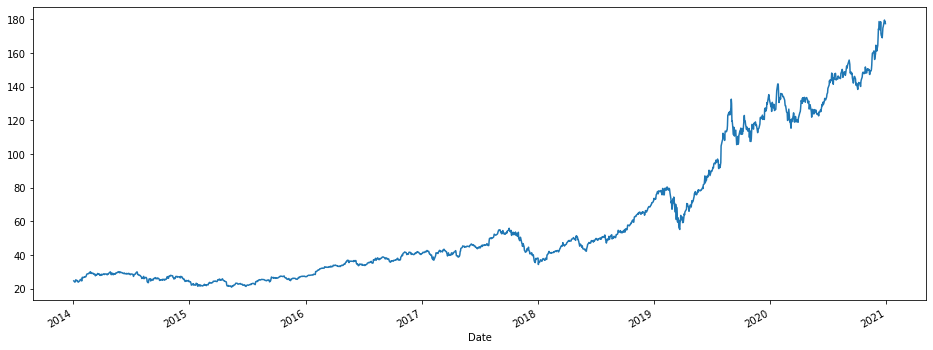

In [ ]:
aapl_data['Adj Close'].plot(figsize = (16,6))

In [ ]:
aapl_data['y_Strat1'] = np.where(aapl_data['Adj Close'].shift(-1) > aapl_data['Adj Close'], 1, -1)

aapl_data.head()

,Open,High,Low,Close,Adj Close,Volume,y_Strat1
Date,,,,,,,
2015-01-02 00:00:00-05:00,27.847500,27.860001,26.837500,27.332500,24.644016,212818400,-1
2015-01-05 00:00:00-05:00,27.072500,27.162500,26.352501,26.562500,23.949759,257142000,1
2015-01-06 00:00:00-05:00,26.635000,26.857500,26.157499,26.565001,23.952011,263188400,1
2015-01-07 00:00:00-05:00,26.799999,27.049999,26.674999,26.937500,24.287872,160423600,1
2015-01-08 00:00:00-05:00,27.307501,28.037500,27.174999,27.972500,25.221069,237458000,1


In [ ]:
# Add a simple moving average - 50
aapl_data['SMA_50'] = aapl_data['Adj Close'].rolling(50).mean()
aapl_data

,Open,High,Low,Close,Adj Close,Volume,y_Strat1,SMA_50
Date,,,,,,,,
2015-01-02 00:00:00-05:00,27.847500,27.860001,26.837500,27.332500,24.644016,212818400,-1,NaN
2015-01-05 00:00:00-05:00,27.072500,27.162500,26.352501,26.562500,23.949759,257142000,1,NaN
2015-01-06 00:00:00-05:00,26.635000,26.857500,26.157499,26.565001,23.952011,263188400,1,NaN
2015-01-07 00:00:00-05:00,26.799999,27.049999,26.674999,26.937500,24.287872,160423600,1,NaN
2015-01-08 00:00:00-05:00,27.307501,28.037500,27.174999,27.972500,25.221069,237458000,1,NaN
...,...,...,...,...,...,...,...,...
2021-12-23 00:00:00-05:00,175.850006,176.850006,175.270004,176.279999,175.553543,68356600,1,158.141773
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.586868,74919600,-1,158.874332
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.551132,79144300,1,159.564697


In [ ]:
# Add a simple moving average - 200
aapl_data['SMA_200'] = aapl_data['Adj Close'].rolling(200).mean()
aapl_data

,Open,High,Low,Close,Adj Close,Volume,y_Strat1,SMA_50,SMA_200
Date,,,,,,,,,
2015-01-02 00:00:00-05:00,27.847500,27.860001,26.837500,27.332500,24.644016,212818400,-1,NaN,NaN
2015-01-05 00:00:00-05:00,27.072500,27.162500,26.352501,26.562500,23.949759,257142000,1,NaN,NaN
2015-01-06 00:00:00-05:00,26.635000,26.857500,26.157499,26.565001,23.952011,263188400,1,NaN,NaN
2015-01-07 00:00:00-05:00,26.799999,27.049999,26.674999,26.937500,24.287872,160423600,1,NaN,NaN
2015-01-08 00:00:00-05:00,27.307501,28.037500,27.174999,27.972500,25.221069,237458000,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-23 00:00:00-05:00,175.850006,176.850006,175.270004,176.279999,175.553543,68356600,1,158.141773,141.662676
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.586868,74919600,-1,158.874332,141.960752
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.551132,79144300,1,159.564697,142.238978


In [ ]:
#For Strategy 1

xfeature = aapl_data['Adj Close']
yfeature = aapl_data['y_Strat1']
xfeature

Date
2015-01-02 00:00:00-05:00     24.644016
2015-01-05 00:00:00-05:00     23.949759
2015-01-06 00:00:00-05:00     23.952011
2015-01-07 00:00:00-05:00     24.287872
2015-01-08 00:00:00-05:00     25.221069
                                ...    
2021-12-23 00:00:00-05:00    175.553543
2021-12-27 00:00:00-05:00    179.586868
2021-12-28 00:00:00-05:00    178.551132
2021-12-29 00:00:00-05:00    178.640778
2021-12-30 00:00:00-05:00    177.465637
Name: Adj Close, Length: 1762, dtype: float64

#Preprocessing- Scaling the features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split (xfeature, yfeature, train_size=0.8, random_state = 50)

In [ ]:
print(f'Train: {x_train.shape, y_train.shape}  \nTest: {x_test.shape, y_test.shape}')

Train: ((1409,), (1409,))  
Test: ((353,), (353,))


In [ ]:
x_train.describe()

count    1409.000000
mean       60.156999
std        40.995939
min        20.949610
25%        28.649466
50%        42.304615
75%        77.662750
max       179.586868
Name: Adj Close, dtype: float64

In [ ]:
x_train= x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
scaler.feature_range

(0, 1)

In [ ]:
scaler.transform(x_train) # This is done so that to pretend  that the test data is “new, unseen data.

array([[0.00460467],
       [0.68250397],
       [0.64839806],
       ...,
       [0.05255791],
       [0.69077228],
       [0.80358587]])

In [ ]:
S1listofmodels = []
S1listofaccuracies = []

S2listofmodels = []
S2listofaccuracies = []

**For - Strategy 1**

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
S1listofmodels.append("KNN")
S1listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.48158640226628896


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

S1listofmodels.append("Random Forest")
S1listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.49575070821529743


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=1, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)
    y_pred = gb_clf.predict(x_test)

    print("Learning rate: ", learning_rate)
    print("Accuracy score: {0:.3f}\n".format(gb_clf.score(x_test, y_test)))

S1listofmodels.append("Gradient Boosting")
S1listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))
#https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/

Learning rate:  0.05
Accuracy score: 0.524

Learning rate:  0.075
Accuracy score: 0.510

Learning rate:  0.1
Accuracy score: 0.510

Learning rate:  0.25
Accuracy score: 0.504

Learning rate:  0.5
Accuracy score: 0.507

Learning rate:  0.75
Accuracy score: 0.524

Learning rate:  1
Accuracy score: 0.533



In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate = .05, max_features=1, max_depth=2, random_state=0)
gb_clf.fit(x_train, y_train)
y_pred = gb_clf.predict(x_test)
print("Accuracy score: {0:.3f}\n".format(gb_clf.score(x_test, y_test)))

Accuracy score: 0.524



Support Vector Machines (SVMs)

In [ ]:
from sklearn import svm

svm_clf = svm.SVC()
svm_clf.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svm_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

S1listofmodels.append("SVM")
S1listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5297450424929179


XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)

XGBClassifier()

In [ ]:
y_pred = xgb_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

S1listofmodels.append("XGBoost")
S1listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5014164305949008


**For - Strategy 2**

In [ ]:
aapl_data

,Open,High,Low,Close,Adj Close,Volume,y_Strat1,SMA_50,SMA_200
Date,,,,,,,,,
2015-01-02 00:00:00-05:00,27.847500,27.860001,26.837500,27.332500,24.644016,212818400,-1,NaN,NaN
2015-01-05 00:00:00-05:00,27.072500,27.162500,26.352501,26.562500,23.949759,257142000,1,NaN,NaN
2015-01-06 00:00:00-05:00,26.635000,26.857500,26.157499,26.565001,23.952011,263188400,1,NaN,NaN
2015-01-07 00:00:00-05:00,26.799999,27.049999,26.674999,26.937500,24.287872,160423600,1,NaN,NaN
2015-01-08 00:00:00-05:00,27.307501,28.037500,27.174999,27.972500,25.221069,237458000,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-12-23 00:00:00-05:00,175.850006,176.850006,175.270004,176.279999,175.553543,68356600,1,158.141773,141.662676
2021-12-27 00:00:00-05:00,177.089996,180.419998,177.070007,180.330002,179.586868,74919600,-1,158.874332,141.960752
2021-12-28 00:00:00-05:00,180.160004,181.330002,178.529999,179.289993,178.551132,79144300,1,159.564697,142.238978


In [ ]:
aapl_data['Signal'] = 0.0
aapl_data['Signal'] = np.where(aapl_data['SMA_50'] > aapl_data['SMA_200'], 1.0, 0.0)

In [ ]:
aapl_data['Position'] = aapl_data['Signal'].diff()
# display first few rows
aapl_data.head()

,Open,High,Low,Close,Adj Close,Volume,y_Strat1,SMA_50,SMA_200,Signal,Position
Date,,,,,,,,,,,
2015-01-02 00:00:00-05:00,27.847500,27.860001,26.837500,27.332500,24.644016,212818400,-1,NaN,NaN,0.0,NaN
2015-01-05 00:00:00-05:00,27.072500,27.162500,26.352501,26.562500,23.949759,257142000,1,NaN,NaN,0.0,0.0
2015-01-06 00:00:00-05:00,26.635000,26.857500,26.157499,26.565001,23.952011,263188400,1,NaN,NaN,0.0,0.0
2015-01-07 00:00:00-05:00,26.799999,27.049999,26.674999,26.937500,24.287872,160423600,1,NaN,NaN,0.0,0.0
2015-01-08 00:00:00-05:00,27.307501,28.037500,27.174999,27.972500,25.221069,237458000,1,NaN,NaN,0.0,0.0


In [ ]:
# Calculating the Average
rolling_mean = aapl_data['Close'].rolling(window=50).mean()
rolling_mean2 = aapl_data['Close'].rolling(window=200).mean()

In [ ]:
#Calculating the y for Strategy 2
y_Strat2 = np.where(rolling_mean > rolling_mean2, 1, -1)
aapl_data["y_Strat2"] = y_Strat2
aapl_data.head()

,Open,High,Low,Close,Adj Close,Volume,y_Strat1,SMA_50,SMA_200,Signal,Position,y_Strat2
Date,,,,,,,,,,,,
2015-01-02 00:00:00-05:00,27.847500,27.860001,26.837500,27.332500,24.644016,212818400,-1,NaN,NaN,0.0,NaN,-1
2015-01-05 00:00:00-05:00,27.072500,27.162500,26.352501,26.562500,23.949759,257142000,1,NaN,NaN,0.0,0.0,-1
2015-01-06 00:00:00-05:00,26.635000,26.857500,26.157499,26.565001,23.952011,263188400,1,NaN,NaN,0.0,0.0,-1
2015-01-07 00:00:00-05:00,26.799999,27.049999,26.674999,26.937500,24.287872,160423600,1,NaN,NaN,0.0,0.0,-1
2015-01-08 00:00:00-05:00,27.307501,28.037500,27.174999,27.972500,25.221069,237458000,1,NaN,NaN,0.0,0.0,-1


In [ ]:
xfeature = aapl_data[['Adj Close']]
yfeature = aapl_data['y_Strat2']

xfeature.head()

,Adj Close
Date,
2015-01-02 00:00:00-05:00,24.644016
2015-01-05 00:00:00-05:00,23.949759
2015-01-06 00:00:00-05:00,23.952011
2015-01-07 00:00:00-05:00,24.287872
2015-01-08 00:00:00-05:00,25.221069


KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_prediction = knn.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, knn_prediction))

S2listofmodels.append("KNN")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.48158640226628896


Random Forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_clf.predict(x_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

S2listofmodels.append("Random Forest")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.49575070821529743


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=1, max_depth=2, random_state=1)
    gb_clf.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score: {0:.3f}\n".format(gb_clf.score(x_test, y_test)))

    ## In gradient boosting, the learning rate corresponds to the weight of newly added predictions, to the original prediction.
    ## If the learning rate is high it means that adding new predictions has a greater affect on the original prediction.
    ## So, we expect higher learning rates to cause overfitting, the model learns to fit the data too quickly.

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate = .05, max_features=1, max_depth=2, random_state=0)
gb_clf.fit(x_train, y_train)
y_pred = gb_clf.predict(x_test)
print("Accuracy score: {0:.3f}\n".format(gb_clf.score(x_test, y_test)))

S2listofmodels.append("Gradient Boosting")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy score: 0.524



Support Vector Machines (SVMs)

In [ ]:
svm_clf = svm.SVC()
svm_clf.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svm_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

S2listofmodels.append("SVM")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5297450424929179


XGBoost

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)

XGBClassifier()

In [ ]:
y_pred = xgb_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

S2listofmodels.append("XGBoost")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5014164305949008


**Results**

In [ ]:
#For Strategy 1

d = {
    'Algorithm': S1listofmodels,
    'Accuracy': S1listofaccuracies
}
df = pd.DataFrame(data=d)
df


,Algorithm,Accuracy
0,KNN,0.481586
1,Random Forest,0.495751
2,Gradient Boosting,0.532578
3,SVM,0.529745
4,XGBoost,0.501416


In [ ]:
#For Strategy 2

d2 = {
    'Algorithm': S2listofmodels,
    'Accuracy': S2listofaccuracies
}
df2 = pd.DataFrame(data=d2)
df2

,Algorithm,Accuracy
0,KNN,0.501416
1,Random Forest,0.495751
2,Gradient Boosting,0.524079
3,SVM,0.529745
4,XGBoost,0.501416
